In [22]:
import torch #Import the torch library
from torch.utils.data import Dataset, DataLoader #DataLoader is a wrapper around the Dataset
from torchvision import datasets #datasets will allow us to import the MNIST library
from torchvision.transforms import ToTensor #ToTensor is the transform function
from torch import nn #Neural network module from pytorch
from torchsummary import summary
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix, roc_auc_score,accuracy_score,precision_recall_fscore_support
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from scipy.stats import mode, norm, skew, kurtosis
from sklearn.preprocessing import LabelEncoder
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split


In [23]:
# device = ( "cuda" if torch.cuda.is_available() else 'cpu')
# print(device)


#Standard code to check if GPU/cuda is available
if torch.cuda.is_available():
    device=torch.device(type="cuda",index=0)
else:
    device=torch.device(type="cpu",index=0)

print(torch.cuda.is_available())

print(device)

True
cuda:0


In [24]:
#Load the MNIST dataset
training_data=datasets.MNIST(root='data',train=True,download=True,transform=ToTensor())
testing_data=datasets.MNIST(root='data',train=False,download=True,transform=ToTensor())

In [25]:
train_dataloader=DataLoader(training_data,batch_size=16,shuffle=True)
test_dataloader=DataLoader(testing_data,batch_size=16,shuffle=True)

In [26]:
# train_dataloader.dataset.classes
training_data.classes

['0 - zero',
 '1 - one',
 '2 - two',
 '3 - three',
 '4 - four',
 '5 - five',
 '6 - six',
 '7 - seven',
 '8 - eight',
 '9 - nine']

In [27]:
print(len(train_dataloader))

3750


In [28]:
# Model Class API

class linear_model_1(nn.Module):

    # The init method creates all the layers. These layers are created/allocated memory at runtime
    def __init__(self):
        super().__init__()
        self.relu = nn.ReLU()
        self.flatten = nn.Flatten()
        self.l1 = nn.Linear(in_features=28*28, out_features=512)
        self.b1 = nn.BatchNorm1d(num_features=512)
        self.l2 = nn.Linear(in_features=512, out_features=256)
        self.b2 = nn.BatchNorm1d(num_features=256)
        self.l3 = nn.Linear(in_features=256, out_features=128)
        self.b3 = nn.BatchNorm1d(num_features=128)
        self.l4 = nn.Linear(in_features=128, out_features=64)
        self.b4 = nn.BatchNorm1d(num_features=64)
        self.l5 = nn.Linear(in_features=64, out_features=32)
        self.b5 = nn.BatchNorm1d(num_features=32)
        self.l6 = nn.Linear(in_features=32, out_features=10)
        self.b6 = nn.BatchNorm1d(num_features=10)
        return

    # The forward method will make the logical connections to the input
    # will go through all the layers up till the output layer
    def forward(self, x):
        x = self.flatten(x)
        x = self.l1(x)
        x = self.b1(x)
        x = self.relu(x)

        x = self.l2(x)
        x = self.b2(x)
        x = self.relu(x)

        x = self.l3(x)
        x = self.b3(x)
        x = self.relu(x)

        x = self.l4(x)
        x = self.b4(x)
        x = self.relu(x)

        x = self.l5(x)
        x = self.b5(x)
        x = self.relu(x)

        x = self.l6(x)
        x = self.b6(x)
        return x

In [29]:
# Model Class API

class linear_model_2(nn.Module):

    # The init method creates all the layers. These layers are created/allocated memory at runtime
    def __init__(self):
        super().__init__()
        self.relu = nn.ReLU()
        self.flatten = nn.Flatten()
        self.l1 = nn.Linear(in_features=28*28, out_features=512)
        self.b1 = nn.BatchNorm1d(num_features=512)
        self.l2 = nn.Linear(in_features=512, out_features=256)
        self.b2 = nn.BatchNorm1d(num_features=256)
        self.l3 = nn.Linear(in_features=256, out_features=128)
        self.b3 = nn.BatchNorm1d(num_features=128)
        self.l4 = nn.Linear(in_features=128, out_features=64)
        self.b4 = nn.BatchNorm1d(num_features=64)
        self.l6 = nn.Linear(in_features=64, out_features=10)
        self.b6 = nn.BatchNorm1d(num_features=10)
        return

    # The forward method will make the logical connections to the input
    # will go through all the layers up till the output layer
    def forward(self, x):
        x = self.flatten(x)
        x = self.l1(x)
        x = self.b1(x)
        x = self.relu(x)

        x = self.l2(x)
        x = self.b2(x)
        x = self.relu(x)

        x = self.l3(x)
        x = self.b3(x)
        x = self.relu(x)

        x = self.l4(x)
        x = self.b4(x)
        x = self.relu(x)

        x = self.l6(x)
        x = self.b6(x)
        return x

In [30]:
# Model Class API

class linear_model_3(nn.Module):

    # The init method creates all the layers. These layers are created/allocated memory at runtime
    def __init__(self):
        super().__init__()
        self.relu = nn.ReLU()
        self.flatten = nn.Flatten()
        self.l1 = nn.Linear(in_features=28*28, out_features=512)
        self.b1 = nn.BatchNorm1d(num_features=512)
        self.l2 = nn.Linear(in_features=512, out_features=256)
        self.b2 = nn.BatchNorm1d(num_features=256)
        self.l3 = nn.Linear(in_features=256, out_features=200)
        self.b3 = nn.BatchNorm1d(num_features=200)
        self.l4 = nn.Linear(in_features=200, out_features=128)
        self.b4 = nn.BatchNorm1d(num_features=128)
        self.l5 = nn.Linear(in_features=128, out_features=64)
        self.b5 = nn.BatchNorm1d(num_features=64)
        self.l6 = nn.Linear(in_features=64, out_features=32)
        self.b6 = nn.BatchNorm1d(num_features=32)
        self.l7 = nn.Linear(in_features=32, out_features=10)
        self.b7 = nn.BatchNorm1d(num_features=10)
        return

    # The forward method will make the logical connections to the input
    # will go through all the layers up till the output layer
    def forward(self, x):
        x = self.flatten(x)
        x = self.l1(x)
        x = self.b1(x)
        x = self.relu(x)

        x = self.l2(x)
        x = self.b2(x)
        x = self.relu(x)

        x = self.l3(x)
        x = self.b3(x)
        x = self.relu(x)

        x = self.l4(x)
        x = self.b4(x)
        x = self.relu(x)

        x = self.l5(x)
        x = self.b5(x)
        x = self.relu(x)

        x = self.l6(x)
        x = self.b6(x)
        x = self.relu(x)

        x = self.l7(x)
        x = self.b7(x)
        return x

In [31]:
loss_fn=nn.CrossEntropyLoss()

model_1=linear_model_1().to(device)
optimizer_Adam_1 = torch.optim.Adam(model_1.parameters(), lr=0.0005)
optimizer_Adagrade_1 = torch.optim.Adagrad(model_1.parameters(), lr=0.0005)


model_2=linear_model_2().to(device)
optimizer_Adam_2 = torch.optim.Adam(model_2.parameters(), lr=0.0005)
optimizer_Adagrade_2 = torch.optim.Adagrad(model_2.parameters(), lr=0.0005)

model_3=linear_model_3().to(device)
optimizer_Adam_3 = torch.optim.Adam(model_3.parameters(), lr=0.0005)
optimizer_Adagrade_3 = torch.optim.Adagrad(model_3.parameters(), lr=0.0005)


In [32]:
def train(dataloader, model, loss_fn, optimizer):
    size = len(dataloader.dataset)
    correct_predictions=0
    model.train()  # Set the model in training mode
    for batch, (X, y) in enumerate(dataloader):
        X, y = X.to(device), y.to(device)

# X is image
# y is label

        # Compute prediction error
        pred = model(X)
        loss = loss_fn(pred, y)

        # Backpropagation: 
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        # Calculate total correct predictions
        predicted_class = torch.argmax(pred, dim=1)
        acc = (predicted_class == y).sum().item()
        correct_predictions+=acc
        
        
        
        if batch % 100 == 0:
            loss, current = loss.item(), (batch + 1) * len(X)
            print(f"loss: {loss:>7f}  [{current:>5d}/{size:>5d}]")
    print(f"correct predictions = {correct_predictions}")
    print(f"Epoch Accuracy = {correct_predictions/(16*len(dataloader))}")

In [33]:
def confusionMatrix(cm,size):
    plt.figure(figsize=(size, size))
    labels=[i[0] for i in training_data.classes]
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.title('Confusion Matrix')
    plt.show()

In [34]:
Metrics_models = pd.DataFrame(columns=["Model","Optimizer", "Accuracy", "Precision weighted", "Recall weighted", "F1 Score weighted"])

In [35]:
def test_og(dataloader, model, loss_fn):
    size = len(dataloader.dataset)
    num_batches = len(dataloader)
    correct_predictions=0
    model.eval()  # Set the model in evaluation mode
    test_loss= 0


    with torch.no_grad():
        for batch, (X, y) in enumerate(dataloader):
            X, y = X.to(device), y.to(device)
            pred = model(X)
            test_loss += loss_fn(pred, y).item()
            correct_predictions += (pred.argmax(1) == y).sum().item()
    test_loss /= num_batches
    correct_predictions /= size
    print(f"Test Error: \n Accuracy: {(100*correct_predictions):>0.1f}%, Avg loss: {test_loss:>8f} \n")
    




def test(dataloader, model, loss_fn,optimizer):
    size = len(dataloader.dataset)
    num_batches = len(dataloader)
    correct_predictions = 0
    model.eval()  # Set the model in evaluation mode
    test_loss = 0
    all_predictions = []
    all_targets = []

    with torch.no_grad():
        for batch, (X, y) in enumerate(dataloader):
            X, y = X.to(device), y.to(device)
            pred = model(X)
            test_loss += loss_fn(pred, y).item()
            correct_predictions += (pred.argmax(1) == y).sum().item()

            # Collect predictions and true labels for additional metrics
            all_predictions.extend(pred.argmax(1).cpu().numpy())
            all_targets.extend(y.cpu().numpy())

    test_loss /= num_batches
    correct_predictions /= size
    print(f"Test Error: \n Accuracy: {(100*correct_predictions):>0.1f}%, Avg loss: {test_loss:>8f} \n")

    # Additional metrics
    accuracy = accuracy_score(all_targets, all_predictions)
    precision = precision_score(all_targets, all_predictions, average='weighted')
    recall = recall_score(all_targets, all_predictions , average='weighted')
    f1 = f1_score(all_targets, all_predictions, average='weighted')
    confusion_mat = confusion_matrix(all_targets, all_predictions)
    # roc_auc = roc_auc_score(all_targets, all_predictions)

    print(f"Model: {type(model).__name__}")
    print(f"Accuracy: {accuracy}")
    print(f"Precision: {precision}")
    print(f"Recall: {recall}")
    print(f"F1-score: {f1}")
    # print(f"Confusion Matrix:\n {confusion_mat}")
    confusionMatrix(confusion_mat,5)
    Metrics_models.loc[len(Metrics_models.index)] = [type(model).__name__,type(optimizer).__name__,accuracy,precision,recall,f1]  

    # print(f"ROC AUC: {roc_auc}")


In [36]:
def runEpoch(epochs,train_dataloader,test_dataloader, model, loss_fn, optimizer):
    for epoch in range(epochs):
        print(f"Epoch {epoch+1}\n-------------------------------")
        train(train_dataloader, model, loss_fn, optimizer)
    test(test_dataloader, model,loss_fn,optimizer)

In [37]:
type(model_1).__name__
type(optimizer_Adagrade_1).__name__

'Adagrad'

Epoch 1
-------------------------------
loss: 2.678167  [   16/60000]


loss: 1.301328  [ 1616/60000]
loss: 0.645610  [ 3216/60000]
loss: 0.822107  [ 4816/60000]
loss: 0.680473  [ 6416/60000]
loss: 0.897295  [ 8016/60000]
loss: 1.001191  [ 9616/60000]
loss: 0.390361  [11216/60000]
loss: 0.455153  [12816/60000]
loss: 0.485454  [14416/60000]
loss: 0.838326  [16016/60000]
loss: 0.387441  [17616/60000]
loss: 0.688863  [19216/60000]
loss: 0.445749  [20816/60000]
loss: 1.148253  [22416/60000]
loss: 0.469523  [24016/60000]
loss: 0.704006  [25616/60000]
loss: 0.923529  [27216/60000]
loss: 0.546619  [28816/60000]
loss: 0.328023  [30416/60000]
loss: 0.359813  [32016/60000]
loss: 0.346802  [33616/60000]
loss: 0.283141  [35216/60000]
loss: 0.786322  [36816/60000]
loss: 0.323262  [38416/60000]
loss: 0.422448  [40016/60000]
loss: 0.402736  [41616/60000]
loss: 0.195891  [43216/60000]
loss: 0.197661  [44816/60000]
loss: 0.134958  [46416/60000]
loss: 0.377483  [48016/60000]
loss: 0.115047  [49616/60000]
loss: 0.448330  [51216/60000]
loss: 0.474641  [52816/60000]
loss: 0.42

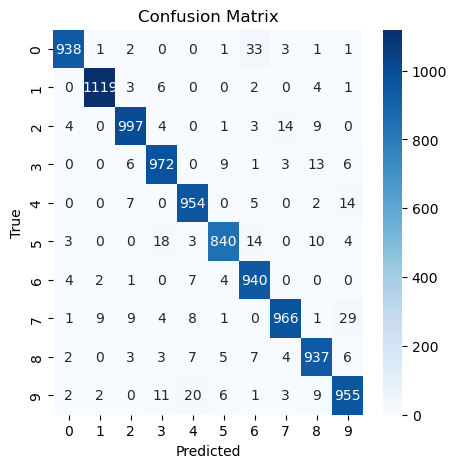

Epoch 1
-------------------------------
loss: 2.857803  [   16/60000]
loss: 0.831382  [ 1616/60000]
loss: 1.048399  [ 3216/60000]
loss: 0.514851  [ 4816/60000]
loss: 0.602741  [ 6416/60000]
loss: 0.531238  [ 8016/60000]
loss: 0.440576  [ 9616/60000]
loss: 0.719309  [11216/60000]
loss: 0.783360  [12816/60000]
loss: 0.609211  [14416/60000]
loss: 0.382253  [16016/60000]
loss: 0.673607  [17616/60000]
loss: 0.766051  [19216/60000]
loss: 0.421363  [20816/60000]
loss: 0.700699  [22416/60000]
loss: 0.515110  [24016/60000]
loss: 1.167928  [25616/60000]
loss: 0.492992  [27216/60000]
loss: 0.431239  [28816/60000]
loss: 0.516872  [30416/60000]
loss: 0.469511  [32016/60000]
loss: 0.264471  [33616/60000]
loss: 0.438565  [35216/60000]
loss: 0.529972  [36816/60000]
loss: 0.553596  [38416/60000]
loss: 0.261463  [40016/60000]
loss: 0.395289  [41616/60000]
loss: 0.494163  [43216/60000]
loss: 0.280685  [44816/60000]
loss: 0.180198  [46416/60000]
loss: 0.558921  [48016/60000]
loss: 0.250225  [49616/60000]


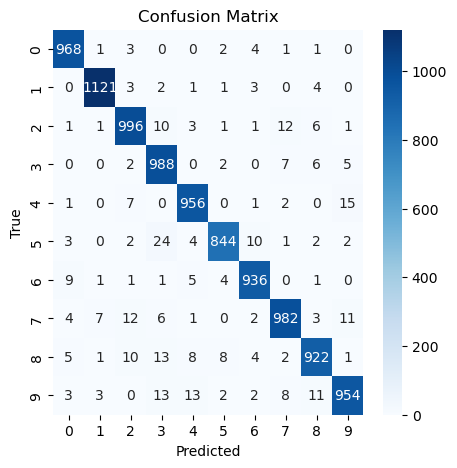

In [38]:
# Comparing the the models when Batch normalization is applied before and after relu
runEpoch(1, train_dataloader, test_dataloader,
         model_1, loss_fn, optimizer_Adam_1)
runEpoch(1, train_dataloader, test_dataloader,
         model_2, loss_fn, optimizer_Adam_2)


In [39]:
Metrics_models

,Model,Optimizer,Accuracy,Precision weighted,Recall weighted,F1 Score weighted
0,linear_model_1,Adam,0.9618,0.962098,0.9618,0.961817
1,linear_model_2,Adam,0.9667,0.966863,0.9667,0.966680


Epoch 1
-------------------------------
loss: 2.606491  [   16/60000]
loss: 0.737800  [ 1616/60000]
loss: 0.752923  [ 3216/60000]
loss: 0.793634  [ 4816/60000]
loss: 0.692455  [ 6416/60000]
loss: 0.975462  [ 8016/60000]
loss: 1.006647  [ 9616/60000]
loss: 0.725952  [11216/60000]
loss: 0.446003  [12816/60000]
loss: 0.372147  [14416/60000]
loss: 0.505835  [16016/60000]
loss: 0.549374  [17616/60000]
loss: 0.506934  [19216/60000]
loss: 0.474407  [20816/60000]
loss: 0.664027  [22416/60000]
loss: 0.537409  [24016/60000]
loss: 0.949540  [25616/60000]
loss: 0.645381  [27216/60000]
loss: 0.257225  [28816/60000]
loss: 0.624623  [30416/60000]
loss: 0.854490  [32016/60000]
loss: 0.446003  [33616/60000]
loss: 0.447498  [35216/60000]
loss: 0.827173  [36816/60000]
loss: 0.626290  [38416/60000]
loss: 0.493897  [40016/60000]
loss: 0.283803  [41616/60000]
loss: 0.417804  [43216/60000]
loss: 0.453145  [44816/60000]
loss: 0.521602  [46416/60000]
loss: 0.333803  [48016/60000]
loss: 0.337279  [49616/60000]


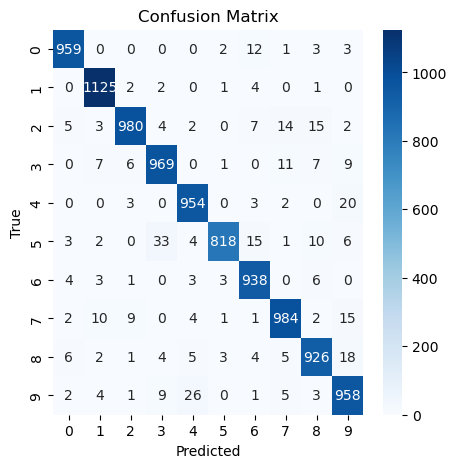

In [40]:
runEpoch(1, train_dataloader, test_dataloader,
         model_3, loss_fn, optimizer_Adam_3)

In [41]:
Metrics_models

,Model,Optimizer,Accuracy,Precision weighted,Recall weighted,F1 Score weighted
0,linear_model_1,Adam,0.9618,0.962098,0.9618,0.961817
1,linear_model_2,Adam,0.9667,0.966863,0.9667,0.966680
2,linear_model_3,Adam,0.9611,0.961396,0.9611,0.961066
